In [68]:
#Tested for Page 42 3.20Question of truss

import numpy as np
import math
from numpy.linalg import inv
import random
import matplotlib.pyplot as plt
from tqdm import tqdm
area=5
E=10e6
nodes=int(input("Enter the nodes: "))

GLOBAL=np.zeros((nodes*2,nodes*2))
add=np.zeros((nodes*2,nodes*2))
joints=np.zeros((nodes,3))
small=np.zeros((2,2))

for i in range(nodes):
    print(i+1)
    joints[i][0]=i+1    #the joint number
    joints[i][1]=input("X:")
    joints[i][2]=input("Y:")
ELEMENT=int(input("Enter the ELEMENTS: "))
element=np.zeros((ELEMENT,9))
print("Enter the nodes one after the other corresponding to the element that is displayed")
for j in range(ELEMENT):
    print("\n")
    print("ELEMENT NUMBER:",j+1)
    element[j][0]=j+1
    element[j][1]=input("Enter the NODE I:")
    element[j][2]=input("Enter the NODE II:")
    #element[j][3]=input("Enter the angle   :")
    #element[j][3]=math.radians(element[j][3])
    try:
        element[j][3]=np.arctan((joints[int(element[j][2]-1)][2]-joints[int(element[j][1]-1)][2])/(joints[int(element[j][2]-1)][1]-joints[int(element[j][1]-1)][1]))
    except:
        element[j][3]=np.tan(90)
    element[j][4]=joints[int(element[j][1]-1)][1]
    element[j][5]=joints[int(element[j][1]-1)][2]
    element[j][6]=joints[int(element[j][2]-1)][1]
    element[j][7]=joints[int(element[j][2]-1)][2]
    element[j][8]=((element[j][4]-element[j][6])**2+(element[j][5]-element[j][7])**2)**0.5

Forces=np.zeros((nodes*2,1))
vi=int(input("Enter the Total number of nodes where Point loads are applied:"))
ForceNodenumbers=np.zeros((vi))
for i in range(vi):
    ForceNodenumbers[i]=int(input("Enter the Node numbers where Load is applied one by one:"))
for i in range(vi):
    print("\n")
    print("Force Input at Node: ",ForceNodenumbers[i])
    Forces[int(2*(ForceNodenumbers[i]-1))][0]=float(input("enter the X force in the Node:"))
    Forces[int((2*(ForceNodenumbers[i]-1))+1)][0]=float(input("enter the Y force in the Node:"))

DOF=np.zeros((2,1))
print("Make the two DOF constraint in the last two node numbers")
DOF[0][0]=int(input("Enter the first DOF Suppress node (second one will be automatically taken): "))

Measurement=int(input("Enter the measurement node:"))

def TRUSS(joints,element,GLOBAL,Forces,small,add):
    for i in range(ELEMENT):
        #print("Element:",element[i][0],"node connection:",element[i][1],element[i][2],"Angle:",np.degrees(element[i][3]),"L:",element[i][8])
        element[i][3]=np.arctan((joints[int(element[i][2]-1)][2]-joints[int(element[i][1]-1)][2])/(joints[int(element[i][2]-1)][1]-joints[int(element[i][1]-1)][1]))
        small[0][0]=round((np.cos(element[i][3])**2)*area*E/element[i][8],3)
        small[0][1]=round(np.cos(element[i][3])*np.sin(element[i][3])*area*E/element[i][8],3)
        small[1][0]=round(np.cos(element[i][3])*np.sin(element[i][3])*area*E/element[i][8],3)
        small[1][1]=round((np.sin(element[i][3])**2)*area*E/element[i][8],3)
        #print(small)
        #print(area*E/element[i][8])
        for x in range(nodes*2):
            for y in range(nodes*2):
                if(x==2*(element[i][1]-1) and y==2*(element[i][1]-1)):
                    add[x][y]=small[0][0]
                    add[x][y+1]=small[0][1]
                    add[x+1][y]=small[1][0]
                    add[x+1][y+1]=small[1][1]
                if(x==2*(element[i][2]-1) and y==2*(element[i][2]-1)):
                    add[x][y]=small[0][0]
                    add[x][y+1]=small[0][1]
                    add[x+1][y]=small[1][0]
                    add[x+1][y+1]=small[1][1]
                if(x==2*(element[i][1]-1) and y==2*(element[i][2]-1)):
                    add[x][y]=-small[0][0]
                    add[x][y+1]=-small[0][1]
                    add[x+1][y]=-small[1][0]
                    add[x+1][y+1]=-small[1][1]
                if(x==2*(element[i][2]-1) and y==2*(element[i][1]-1)):
                    add[x][y]=-small[0][0]
                    add[x][y+1]=-small[0][1]
                    add[x+1][y]=-small[1][0]
                    add[x+1][y+1]=-small[1][1]
        #print(add)
        GLOBAL=GLOBAL+add
        add.fill(0)
        small.fill(0)
    #print(GLOBAL)

    GLOBAL=np.delete(GLOBAL, (2*int(DOF[0][0])-1),axis=0)
    GLOBAL=np.delete(GLOBAL, (2*int(DOF[0][0])-2),axis=0)

    GLOBAL=np.delete(GLOBAL, (2*int(DOF[0][0])-3),axis=0)
    GLOBAL=np.delete(GLOBAL, (2*int(DOF[0][0])-4),axis=0)

    GLOBAL=np.delete(GLOBAL, (2*int(DOF[0][0])-1),axis=1)
    GLOBAL=np.delete(GLOBAL, (2*int(DOF[0][0])-2),axis=1)

    GLOBAL=np.delete(GLOBAL, (2*int(DOF[0][0])-3),axis=1)
    GLOBAL=np.delete(GLOBAL, (2*int(DOF[0][0])-4),axis=1)
    
    Forces=np.delete(Forces, (2*int(DOF[0][0])-1),axis=0)
    Forces=np.delete(Forces, (2*int(DOF[0][0])-2),axis=0)
    Forces=np.delete(Forces, (2*int(DOF[0][0])-3),axis=0)
    Forces=np.delete(Forces, (2*int(DOF[0][0])-4),axis=0)

    Y=(np.dot(inv(GLOBAL),Forces))
    #print(joints)
    #print("Xdisp=",Y[(Measurement-1)*2][0])
    #print("Ydisp=",Y[1+((Measurement-1)*2)][0])

    #return Y[(Measurement*2)-1][0]
    return Y[1+((Measurement-1)*2)][0]
#O=[]
#MinJoint=np.zeros((nodes,3))
#MIN=30
#for t in tqdm(range(10)):
    #MIN=20 #TRUSS(joints,element,GLOBAL,Forces,small,add)
    #O.append(float(TRUSS(joints,element,GLOBAL,Forces,small,add)))
    #Here You have to input which nodes you may want to move
    #joints[0][1]=0+(-1**random.randint(1,2)*random.randint(1,25))
    #joints[0][2]=0+(-1**random.randint(1,2)*random.randint(1,80))
    
    #joints[7][1]=100+(-1**random.randint(1,2)*random.randint(1,25))
    #joints[7][2]=100+(-1**random.randint(1,2)*random.randint(1,80))
    
    #joints[8][1]=200+(-1**random.randint(1,2)*random.randint(1,25))
    #joints[8][2]=100+(-1**random.randint(1,2)*random.randint(1,80))
    
    #joints[9][1]=300+(-1**random.randint(1,2)*random.randint(1,25))
    #joints[9][2]=100+(-1**random.randint(1,2)*random.randint(1,80))
    
    #joints[10][1]=400+(-1**random.randint(1,2)*random.randint(1,25))
    #joints[10][2]=100+(-1**random.randint(1,2)*random.randint(1,80))
    
    #joints[11][1]=500+(-1**random.randint(1,2)*random.randint(1,25))
    #joints[11][2]=100+(-1**random.randint(1,2)*random.randint(1,80))
    
    #joints[12][1]=600+(-1**random.randint(1,2)*random.randint(1,25))
    #joints[12][2]=100+(-1**random.randint(1,2)*random.randint(1,80))
    
    #joints[13][1]=700+(-1**random.randint(1,2)*random.randint(1,25))
    #joints[13][2]=100+(-1**random.randint(1,2)*random.randint(1,80))
    
    #plt.scatter(joints[0][1],joints[0][2])
    #plt.scatter(joints[1][1],joints[1][2])
    #plt.scatter(joints[2][1],joints[2][2])
    #if TRUSS(joints,element,GLOBAL,Forces,small,add) < MIN:
    #    MinJoints=joints
    #    MIN=TRUSS(joints,element,GLOBAL,Forces,small,add)

#plt.plot(O)
#plt.show()
#print(np.min(O))
#print(MinJoints)

TRUSS(joints,element,GLOBAL,Forces,small,add)
#print("Xdisp=",dispx)
#print("Ydisp=",dispy)

#joints[0][1]=joints[0][1]+(-1**random.randint(1,2)*random.randint(1,20))
#joints[0][2]=joints[0][2]+(-1**random.randint(1,2)*random.randint(1,20))

Enter the nodes: 5
1
X:0
Y:0
2
X:-100
Y:100
3
X:100
Y:100
4
X:-200
Y:0
5
X:200
Y:0
Enter the ELEMENTS: 7
Enter the nodes one after the other corresponding to the element that is displayed


ELEMENT NUMBER: 1
Enter the NODE I:1
Enter the NODE II:4


ELEMENT NUMBER: 2
Enter the NODE I:4
Enter the NODE II:2


ELEMENT NUMBER: 3
Enter the NODE I:2
Enter the NODE II:1


ELEMENT NUMBER: 4
Enter the NODE I:1
Enter the NODE II:3


ELEMENT NUMBER: 5
Enter the NODE I:3
Enter the NODE II:5


ELEMENT NUMBER: 6
Enter the NODE I:1
Enter the NODE II:5


ELEMENT NUMBER: 7
Enter the NODE I:2
Enter the NODE II:3
Enter the Total number of nodes where Point loads are applied:1
Enter the Node numbers where Load is applied one by one:1


Force Input at Node:  1.0
enter the X force in the Node:0
enter the Y force in the Node:-10000
Make the two DOF constraint in the last two node numbers
Enter the first DOF Suppress node (second one will be automatically taken): 5
Enter the measurement node:1


-0.09656854258984758

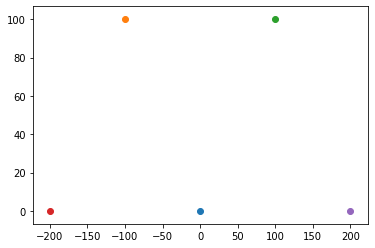

In [37]:
for ttt in range(nodes):
    plt.scatter(joints[ttt][1],joints[ttt][2])

In [38]:
print(joints)

[[   1.    0.    0.]
 [   2. -100.  100.]
 [   3.  100.  100.]
 [   4. -200.    0.]
 [   5.  200.    0.]]


The cycling through the joints.

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:30<00:00,  1.62it/s]

0.05869397936740571
[[   1.            0.            0.        ]
 [   2.          -50.39426493   93.73333832]
 [   3.          149.60573507   93.73333832]
 [   4.         -200.            0.        ]
 [   5.          200.            0.        ]]


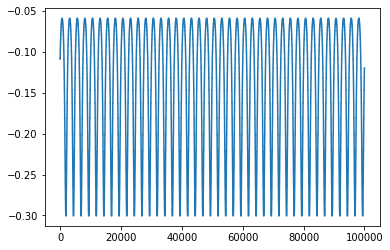

In [96]:
Min=100
O=[]
#plt.scatter(-100,100)
#plt.scatter(100,100)
for radius in range(10,50):
    for i in tqdm(range(50)):
        joints[1][1]=-100+(50*np.cos(np.radians(i*(360/50))))
        joints[1][2]=100+(50*np.sin(np.radians(i*(360/50))))
        for j in range(50):
            joints[2][1]=100+(50*np.cos(np.radians(i*(360/50))))
            joints[2][2]=100+(50*np.sin(np.radians(i*(360/50))))
            TRUSS(joints,element,GLOBAL,Forces,small,add)
            O.append(TRUSS(joints,element,GLOBAL,Forces,small,add))
            if abs(TRUSS(joints,element,GLOBAL,Forces,small,add))<Min:
                Min=abs(TRUSS(joints,element,GLOBAL,Forces,small,add))
                Temp=joints
        #print("\n")
#for ttt in range(nodes):
#    plt.scatter(Temp[ttt][1],Temp[ttt][2])
print(abs(max(O)))
print(Temp)
plt.plot(O)
plt.show()

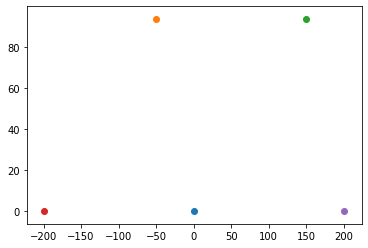

In [97]:
for ttt in range(nodes):
    plt.scatter(Temp[ttt][1],Temp[ttt][2])

In [72]:
print(max(O))

-0.07570390418216044


The Sequencial Cycling of joints positions. 

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 115.31it/s]


0.08524734630388536
[[   1.            0.            0.        ]
 [   2.          -80.03946543   98.74418961]
 [   3.          119.96053457   98.74418961]
 [   4.         -200.            0.        ]
 [   5.          200.            0.        ]]


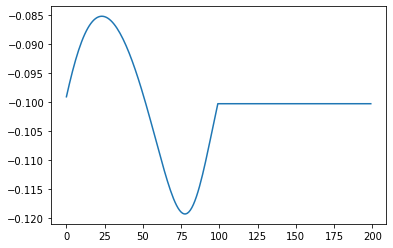

In [90]:
Min=100
O=[]
#plt.scatter(-100,100)
#plt.scatter(100,100)
for i in tqdm(range(100)):
    joints[1][1]=-100+(20*np.cos(np.radians(i*(360/100))))
    joints[1][2]=100+(20*np.sin(np.radians(i*(360/100))))
    O.append(TRUSS(joints,element,GLOBAL,Forces,small,add))
    if abs(TRUSS(joints,element,GLOBAL,Forces,small,add))<Min:
        Min=abs(TRUSS(joints,element,GLOBAL,Forces,small,add))
        Temp=joints
joints=Temp
#Min=abs(TRUSS(joints,element,GLOBAL,Forces,small,add))
for j in tqdm(range(100)):
    joints[2][1]=100+(20*np.cos(np.radians(i*(360/100))))
    joints[2][2]=100+(20*np.sin(np.radians(i*(360/100))))
    O.append(TRUSS(joints,element,GLOBAL,Forces,small,add))
    if abs(TRUSS(joints,element,GLOBAL,Forces,small,add))<Min:
        Min=abs(TRUSS(joints,element,GLOBAL,Forces,small,add))
        Temp=joints
#print("\n")
#for ttt in range(nodes):
#   plt.scatter(joints[ttt][1],joints[ttt][2])
print(Min)
print(joints)
plt.plot(O)
plt.show()

In [ ]:
O=[]
MinJoint=np.zeros((nodes,3))
MIN=30
for t in range(100):
    #MIN=20 #TRUSS(joints,element,GLOBAL,Forces,small,add)
    O.append(float(TRUSS(joints,element,GLOBAL,Forces,small,add)))
    #Here You have to input which nodes you may want to move
    #joints[0][1]=0+(-1**random.randint(1,2)*random.randint(1,25))
    #joints[0][2]=0+(-1**random.randint(1,2)*random.randint(1,80))
    
    #joints[7][1]=100+(-1**random.randint(1,2)*random.randint(1,25))
    joints[7][2]=100+(-1**random.randint(1,2)*random.randint(1,10))
    
    #joints[8][1]=200+(-1**random.randint(1,2)*random.randint(1,25))
    joints[8][2]=100+(-1**random.randint(1,2)*random.randint(1,20))
    
    #joints[9][1]=300+(-1**random.randint(1,2)*random.randint(1,25))
    joints[9][2]=100+(-1**random.randint(1,2)*random.randint(1,30))
    
    #joints[10][1]=400+(-1**random.randint(1,2)*random.randint(1,25))
    joints[10][2]=100+(-1**random.randint(1,2)*random.randint(1,40))
    
    #joints[11][1]=500+(-1**random.randint(1,2)*random.randint(1,25))
    joints[11][2]=100+(-1**random.randint(1,2)*random.randint(1,30))
    
    #joints[12][1]=600+(-1**random.randint(1,2)*random.randint(1,25))
    joints[12][2]=100+(-1**random.randint(1,2)*random.randint(1,20))
    
    #joints[13][1]=700+(-1**random.randint(1,2)*random.randint(1,25))
    joints[13][2]=100+(-1**random.randint(1,2)*random.randint(1,10))
    
    #plt.scatter(joints[0][1],joints[0][2])
    #plt.scatter(joints[1][1],joints[1][2])
    #plt.scatter(joints[2][1],joints[2][2])
    if abs(TRUSS(joints,element,GLOBAL,Forces,small,add)) < MIN:
        MinJoints=joints
        MIN=abs(TRUSS(joints,element,GLOBAL,Forces,small,add))

plt.plot(O)
plt.show()
print(MIN)
print(MinJoints)
for fff in range(16):
    plt.scatter(MinJoints[fff][1],MinJoints[fff][2])
#TRUSS(joints,element,GLOBAL,Forces,small,add)
#joints[0][1]=joints[0][1]+(-1**random.randint(1,2)*random.randint(1,20))
#joints[0][2]=joints[0][2]+(-1**random.randint(1,2)*random.randint(1,20))